# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"



# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date = []
count = 0
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count = count + 1
        print(response['name'] + count)
        print("-------------------------------")
    except: KeyError 
    
#print(json.dumps(response, indent=4, sort_keys=True))
#print(response['name'])
#print(city_name)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_dict = {"City": city_name, "Lattitude": lat, "Longitude": lng, "Max Temperature": max_temp, "Humidity": humidity,
            "Cloud Cover": cloud, "Wind Speed": wind_speed, "Country": country, "Date": date}
city_df = pd.DataFrame(city_dict)
city_df.head()

,City,Lattitude,Longitude,Max Temperature,Humidity,Cloud Cover,Wind Speed,Country,Date
0,Khromtau,50.25,58.43,-7.11,86,97,4.09,KZ,1608500892
1,Ushuaia,-54.80,-68.30,50.00,81,40,24.16,AR,1608500892
2,Kapaa,22.08,-159.32,80.60,78,75,17.22,US,1608500603
3,Dikson,73.51,80.55,-27.26,84,47,7.20,RU,1608500892
4,Hobart,-42.88,147.33,62.01,76,20,6.93,AU,1608500887


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
drop_index = city_df.index[city_df['Humidity'] > 100].tolist()
drop_index

[]

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_df = city_df.drop(city_df.columns[drop_index], axis=1)
clean_df

,City,Lattitude,Longitude,Max Temperature,Humidity,Cloud Cover,Wind Speed,Country,Date
0,Khromtau,50.25,58.43,-7.11,86,97,4.09,KZ,1608500892
1,Ushuaia,-54.80,-68.30,50.00,81,40,24.16,AR,1608500892
2,Kapaa,22.08,-159.32,80.60,78,75,17.22,US,1608500603
3,Dikson,73.51,80.55,-27.26,84,47,7.20,RU,1608500892
4,Hobart,-42.88,147.33,62.01,76,20,6.93,AU,1608500887
...,...,...,...,...,...,...,...,...,...
531,Yulara,-25.24,130.99,69.80,83,100,10.29,AU,1608500997
532,Chiredzi,-21.05,31.67,71.42,94,33,2.04,ZW,1608500998
533,Puerto Baquerizo Moreno,-0.90,-89.60,72.25,87,86,9.60,EC,1608500998
534,Gawler,-34.60,138.73,64.00,81,100,5.01,AU,1608500998


In [7]:
clean_df.to_csv(r'..\weather.csv', index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

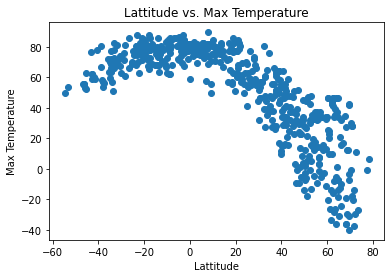

<Figure size 432x288 with 0 Axes>

In [8]:
x = clean_df["Lattitude"]
y = clean_df["Max Temperature"]
plt.scatter(x,y)
plt.title("Lattitude vs. Max Temperature")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_1.pdf")


## Latitude vs. Humidity Plot

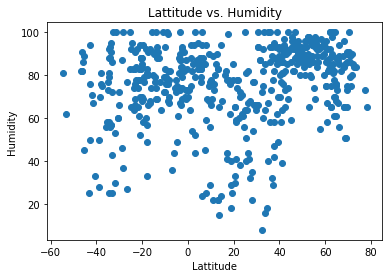

<Figure size 432x288 with 0 Axes>

In [9]:
x = clean_df["Lattitude"]
y = clean_df["Humidity"]
plt.scatter(x,y)
plt.title("Lattitude vs. Humidity")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_2.pdf")


## Latitude vs. Cloudiness Plot

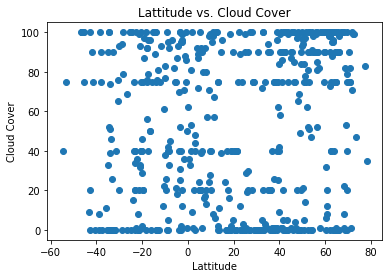

<Figure size 432x288 with 0 Axes>

In [10]:
x = clean_df["Lattitude"]
y = clean_df["Cloud Cover"]
plt.scatter(x,y)
plt.title("Lattitude vs. Cloud Cover")
plt.xlabel("Lattitude")
plt.ylabel("Cloud Cover")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_3.pdf")


## Latitude vs. Wind Speed Plot

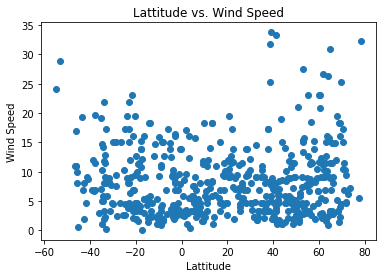

<Figure size 432x288 with 0 Axes>

In [11]:
x = clean_df["Lattitude"]
y = clean_df["Wind Speed"]
plt.scatter(x,y)
plt.title("Lattitude vs. Wind Speed")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_4.pdf")


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6812954448722566


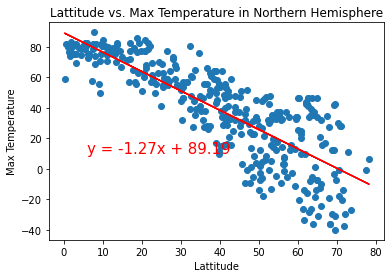

<Figure size 432x288 with 0 Axes>

In [12]:
north_hemi = clean_df.loc[clean_df["Lattitude"] > 0,]
x = north_hemi['Lattitude']
y = north_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Lattitude vs. Max Temperature in Northern Hemisphere")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_5.pdf")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.37687946626997076


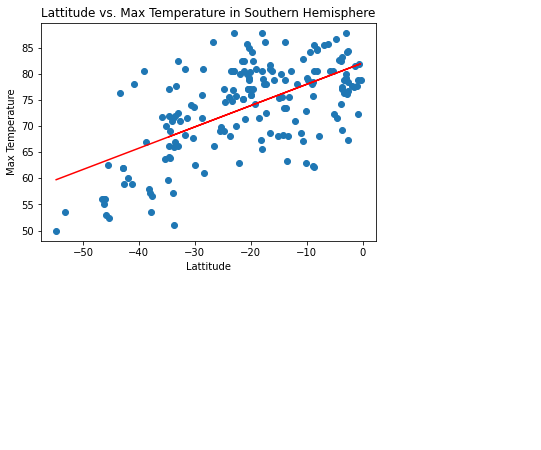

<Figure size 432x288 with 0 Axes>

In [13]:
south_hemi = clean_df.loc[clean_df["Lattitude"] < 0,]
x = south_hemi['Lattitude']
y = south_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Lattitude vs. Max Temperature in Southern Hemisphere")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_6.pdf")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09506386155640473


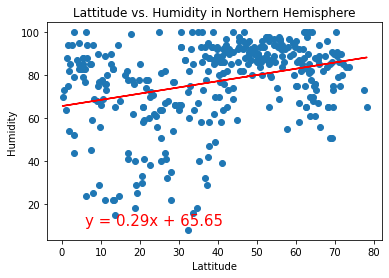

<Figure size 432x288 with 0 Axes>

In [14]:
north_hemi = clean_df.loc[clean_df["Lattitude"] > 0,]
x = north_hemi['Lattitude']
y = north_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Lattitude vs. Humidity in Northern Hemisphere")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_7.pdf")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09506386155640473


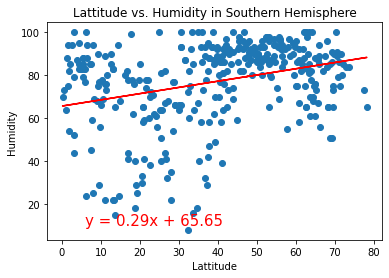

<Figure size 432x288 with 0 Axes>

In [15]:
south_hemi = clean_df.loc[clean_df["Lattitude"] > 0,]
x = south_hemi['Lattitude']
y = south_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Lattitude vs. Humidity in Southern Hemisphere")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_8.pdf")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.049460001549231726


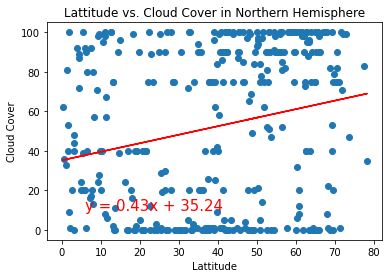

<Figure size 432x288 with 0 Axes>

In [16]:
north_hemi = clean_df.loc[clean_df["Lattitude"] > 0,]
x = north_hemi['Lattitude']
y = north_hemi['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Lattitude vs. Cloud Cover in Northern Hemisphere")
plt.xlabel("Lattitude")
plt.ylabel("Cloud Cover")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_9.pdf")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.049460001549231726


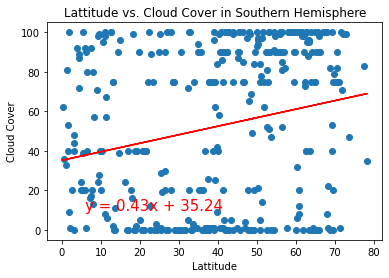

<Figure size 432x288 with 0 Axes>

In [17]:
south_hemi = clean_df.loc[clean_df["Lattitude"] > 0,]
x = south_hemi['Lattitude']
y = south_hemi['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Lattitude vs. Cloud Cover in Southern Hemisphere")
plt.xlabel("Lattitude")
plt.ylabel("Cloud Cover")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_10.pdf")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028497930685164864


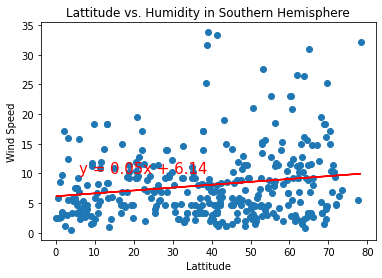

<Figure size 432x288 with 0 Axes>

In [18]:
north_hemi = clean_df.loc[clean_df["Lattitude"] > 0,]
x = north_hemi['Lattitude']
y = north_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Lattitude vs. Humidity in Southern Hemisphere")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_11.pdf")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03675573408649863


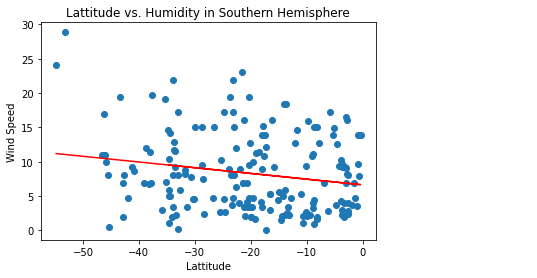

<Figure size 432x288 with 0 Axes>

In [19]:
south_hemi = clean_df.loc[clean_df["Lattitude"] < 0,]
x = south_hemi['Lattitude']
y = south_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Lattitude vs. Humidity in Southern Hemisphere")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/python-api-challenge/weatherpy/plot_12.pdf")
